# Feature Engineering für eine Drohnen Fernsteuerung, die mit einem MPU6050 ausgestattet ist

## 1. Einlesen der Datei und überprüfen, ob die Datenreihen vollständig sind

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix as scatmat
import os


# Absolute Pfad zur Datei extrahieren
ziel_pfad = 'D:\measurements'

# CSV-Datei einlesen
data = pd.read_csv(os.path.join(ziel_pfad, 'mpu6050.csv'), sep=',', decimal='.')

# Die ersten Zeilen anzeigen
data.head()

# Informationen über den Datensatz anzeigen
data.info()

# Sind alle Klassen gleich stark vertreten?
data['RuheState'].value_counts()

# Gibt es Auffälligkeiten bei der Verteilung der Werte?
data.describe()


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 62 entries, (-0.016212, 0.007405) to (0.004295, -0.002849)
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AccX         62 non-null     float64
 1   AccY         62 non-null     float64
 2   AccZ         62 non-null     float64
 3   GyroX        62 non-null     float64
 4   GyroY        62 non-null     float64
 5   GyroZ        62 non-null     float64
 6   AngleX       62 non-null     float64
 7   AngleY       62 non-null     float64
 8   AngleZ       62 non-null     float64
 9   RuheState    62 non-null     int64  
 10  FernstState  62 non-null     int64  
 11  TranspState  62 non-null     int64  
dtypes: float64(9), int64(3)
memory usage: 8.7 KB


,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,AngleX,AngleY,AngleZ,RuheState,FernstState,TranspState
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0
mean,1.005369,-0.060558,-1.005908,-0.047424,0.092106,-1.646569,-1.654205,-0.333273,-0.011861,0.500000,0.500000,0.0
std,0.051359,0.645418,4.553738,0.241354,0.142819,0.444613,0.201025,1.968276,1.595094,0.504082,0.504082,0.0
min,0.877947,-4.403084,-26.885740,-1.829252,-0.086095,-2.459551,-1.879739,-12.278277,-10.432556,0.000000,0.000000,0.0
25%,0.996600,-0.063389,-0.168184,-0.058259,-0.051970,-1.940725,-1.860649,-0.108451,-0.245500,0.000000,0.000000,0.0
50%,0.999285,0.009130,-0.076581,-0.012458,0.184765,-1.665546,-1.564798,-0.009370,0.019706,0.500000,0.500000,0.0
75%,1.005145,0.070198,0.060824,0.018077,0.237198,-1.424546,-1.456353,0.158288,0.287541,1.000000,1.000000,0.0
max,1.372088,1.932794,1.801282,0.140214,0.280037,0.470483,-1.418378,0.507445,6.194137,1.000000,1.000000,0.0


## 2. Irrelevante Merkmale entfernen

In [2]:
# data = data.drop(['user', 'gender'], axis=1)

# 3. Visualisierung der Verteilung der numerischen Werte

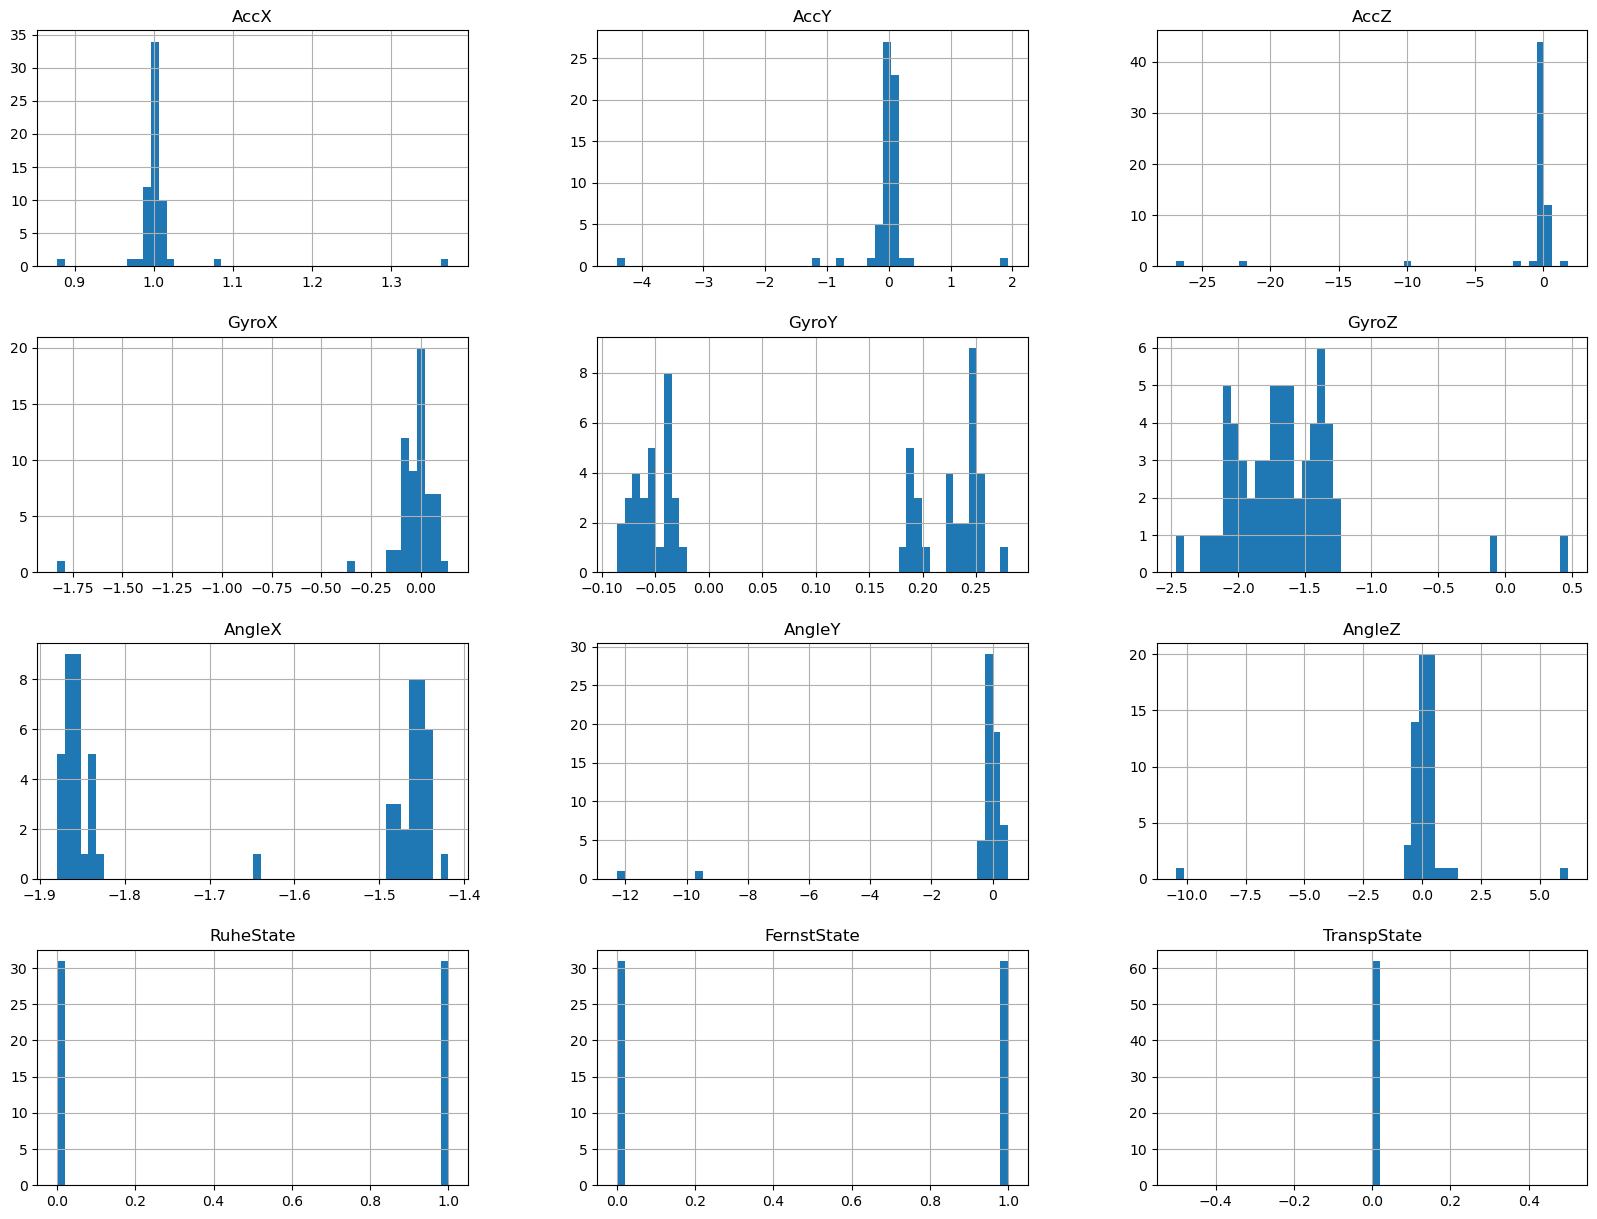

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
data.hist(bins=50, figsize=(20, 15))
plt.show()

## 4. Überprüfen, ob es fehlerhafte Werte gibt (Bspw.: in Spalte 'AccX')

In [4]:
pd.set_option('display.max_rows', 500)
data['AccX'].value_counts()

AccX
0.996600    3
0.998309    3
0.999041    2
0.999529    2
1.001482    2
0.997088    2
0.992449    2
1.001971    2
0.997332    2
0.995623    2
1.014666    2
0.989764    1
1.002947    1
1.003191    1
1.004412    1
1.008807    1
0.998797    1
1.372088    1
0.997820    1
1.076434    1
1.017596    1
1.002459    1
1.010271    1
0.988787    1
0.998064    1
1.011736    1
1.000506    1
1.005389    1
1.006853    1
1.009295    1
1.006365    1
0.970965    1
0.994402    1
1.010760    1
1.005633    1
1.000994    1
0.984148    1
1.004168    1
0.994158    1
1.008074    1
0.996844    1
1.012225    1
0.996355    1
0.993426    1
0.993670    1
1.000018    1
0.992205    1
0.877947    1
1.002215    1
Name: count, dtype: int64

## 5. Fehlerhaften Wert korrigieren (Beispiel)

In [5]:
#data.loc[data['z4'] == '-14420-11-2011 04:50:23.713', 'z4'] = -144

# Spalte 'z4' in numerischen Typ umwandeln
#data['z4'] = pd.to_numeric(data['z4'])

# Informationen über den Datensatz erneut anzeigen
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 62 entries, (-0.016212, 0.007405) to (0.004295, -0.002849)
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AccX         62 non-null     float64
 1   AccY         62 non-null     float64
 2   AccZ         62 non-null     float64
 3   GyroX        62 non-null     float64
 4   GyroY        62 non-null     float64
 5   GyroZ        62 non-null     float64
 6   AngleX       62 non-null     float64
 7   AngleY       62 non-null     float64
 8   AngleZ       62 non-null     float64
 9   RuheState    62 non-null     int64  
 10  FernstState  62 non-null     int64  
 11  TranspState  62 non-null     int64  
dtypes: float64(9), int64(3)
memory usage: 8.7 KB


## 6. Aufteilung des Datensatzes in Trainings- und Validierungsdaten

In [6]:
# Aufteilung in Trainings- und Validierungsdatensätze
train, val = train_test_split(data, test_size=0.2, random_state=42)

# Anzahl der Datensätze anzeigen
len(train), len(val)

# Kopie des Trainingsdatensatzes für Modifikationen
data = train.copy()


## 7. Begrenzung der Auswahl auf die Sensorspalten

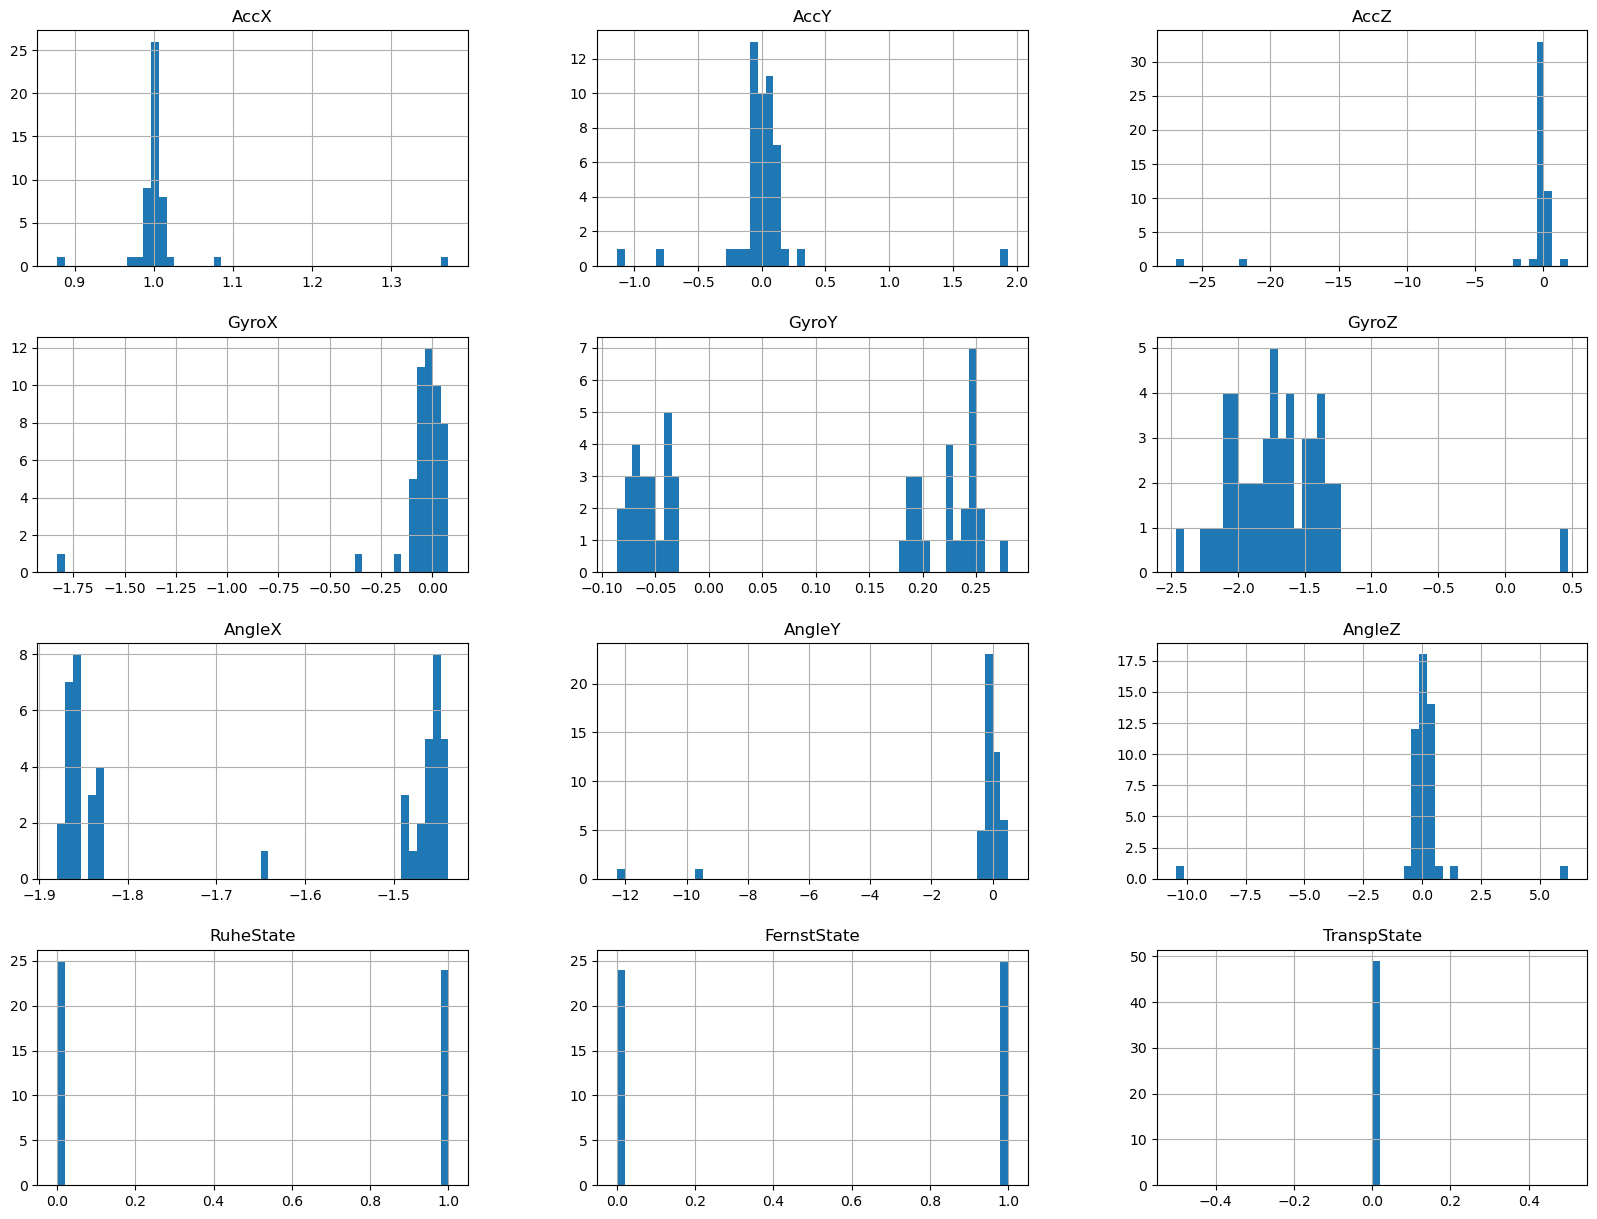

In [7]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

## 8. Prüfung der Korrelationen für verschiedene Sensoren

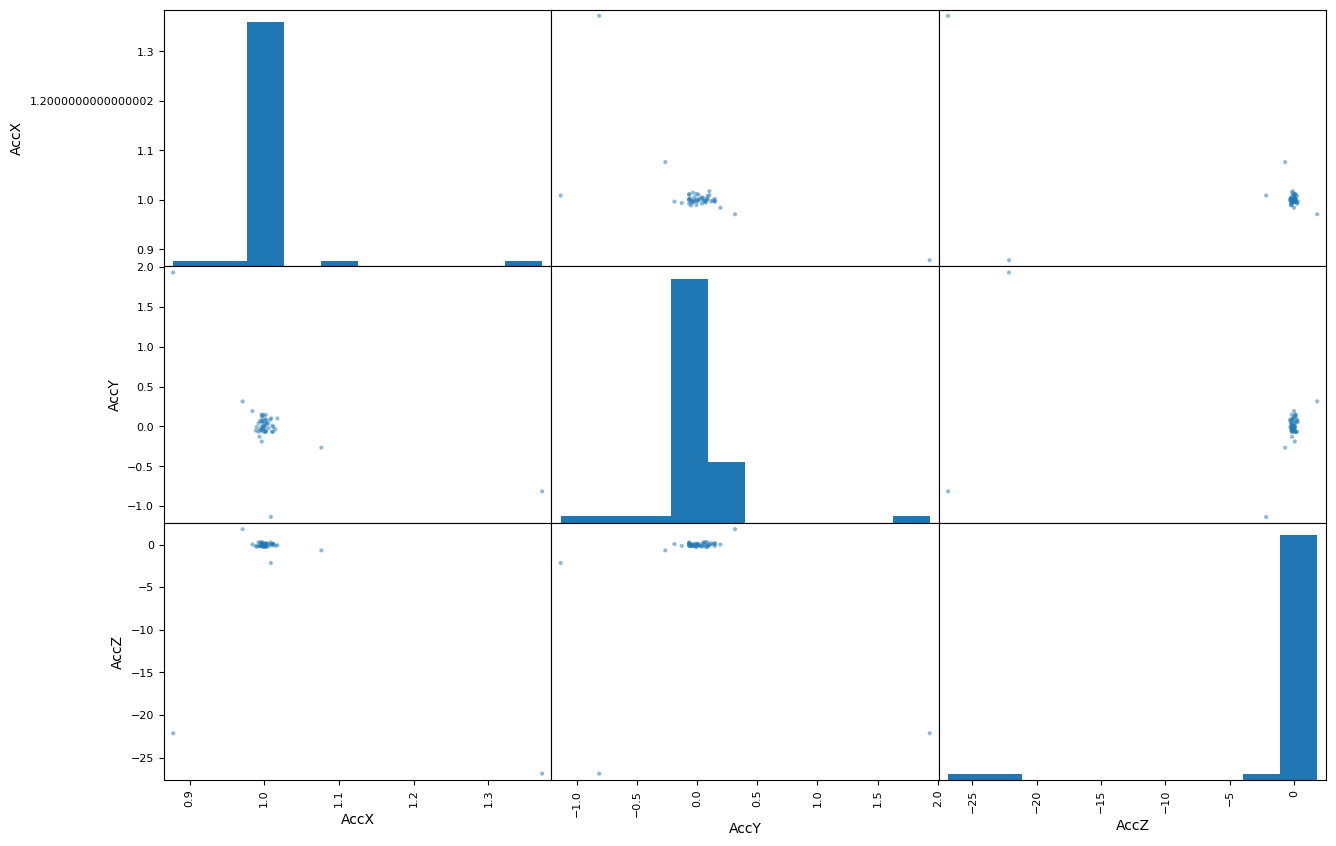

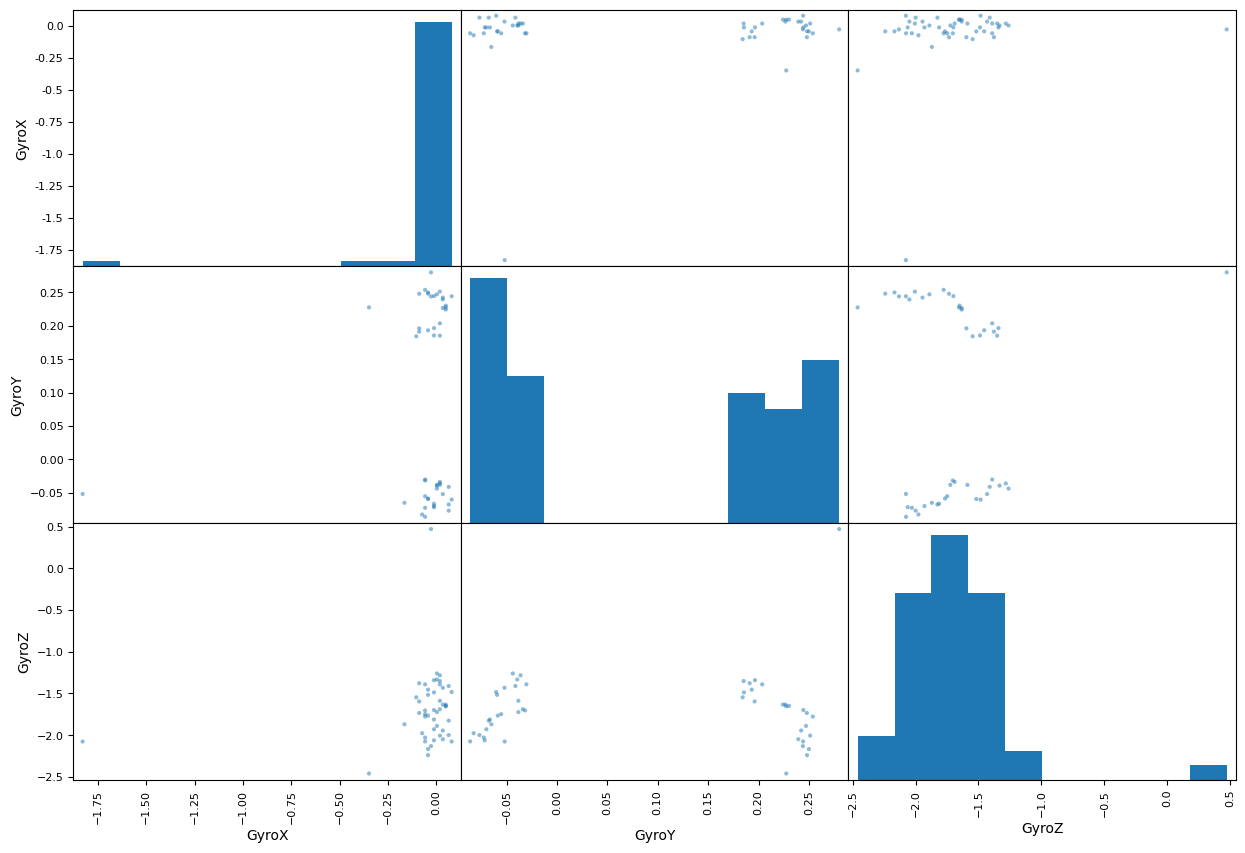

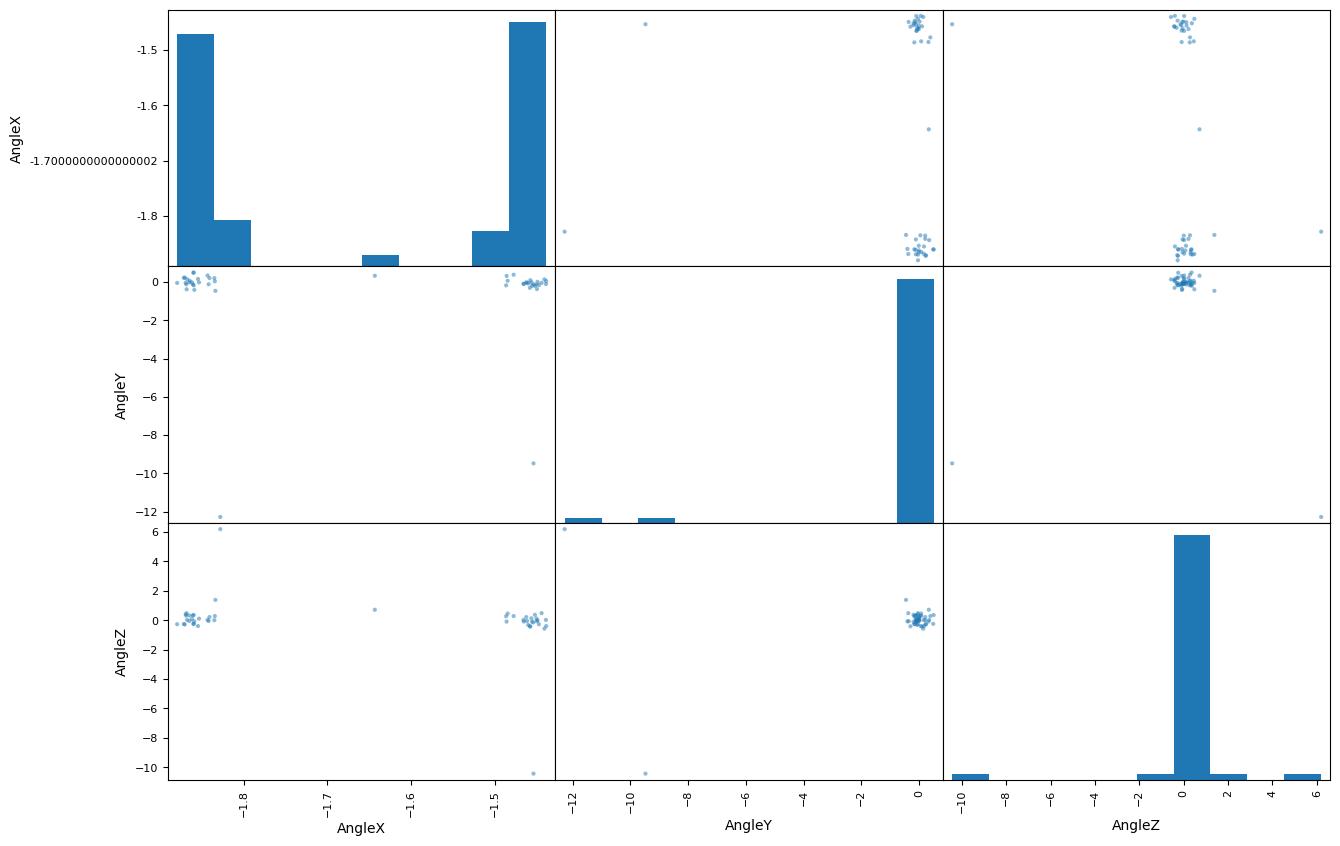

In [8]:
sensors = ['AccX', 'AccY', 'AccZ', 'GyroX', 'GyroY', 'GyroZ', 'AngleX', 'AngleY', 'AngleZ', 'RuheState', 'FernstState', 'TranspState']

for sensor_group in [sensors[:3], sensors[3:6], sensors[6:9]]:
    scatmat(data[sensor_group], figsize=(15, 10))
    plt.show()

## 9. Visualisierung der Klassenzuordnung im Scatterplot (Beispiel)

In [9]:
# Erstellung einer neuen Spalte "class_num" mit einem numerischen Wert je Klasse
# (Nicht notwendig, da die Rohdaten bereits in dieser Form vorliegen)

#data['class_num'], data_categories = data['RuheState'].factorize()

# Anzeige der Zuordnung der Klassen
#for i, cat in enumerate(data_categories):
#    print("Klasse %d: %s" % (i, cat))


## 9. Visualisierung der Klassenzuordnung im Scatterplot

In [10]:
# Dieser Abschnitt macht das selbe wie der Nachfolgende, zählt aber nicht wie häufig eine Klasse vorkommt

# Anzeige der eindeutigen Klassenwerte
#unique_classes = data[['RuheState', 'FernstState', 'TranspState']].drop_duplicates().reset_index(drop=True)

#for i, row in unique_classes.iterrows():
#    print(f"Klasse {i}: Ruhe={row['RuheState']}, Fernsteuerung={row['FernstState']}, Transport={row['TranspState']}")


In [11]:
# Gruppiere nach den Klassenattributen und zähle die Anzahl der Vorkommen
class_counts = data.groupby(['RuheState', 'FernstState', 'TranspState']).size().reset_index(name='count')

# Anzeige aller Kombinationen
for i, row in class_counts.iterrows():
    print(f"Klasse {i}: Ruhe={row['RuheState']}, Fernsteuerung={row['FernstState']}, Transport={row['TranspState']} - Anzahl: {row['count']}")


Klasse 0: Ruhe=0, Fernsteuerung=1, Transport=0 - Anzahl: 25
Klasse 1: Ruhe=1, Fernsteuerung=0, Transport=0 - Anzahl: 24


## 10. Scatterplots für verschiedene Sensorpaare (Beispiel)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 'class_num'

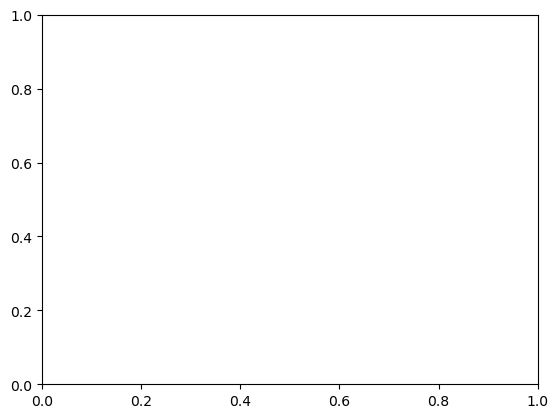

In [12]:
# Wähle Sensorpaare
sensor_pairs = [('AccX', 'AccY'), ('GyroX', 'GyroY'), ('GyroZ', 'AngleX'), ('AngleY', 'AngleZ')]

for pair in sensor_pairs:
    data.plot(kind="scatter", x=pair[0], y=pair[1], alpha=0.1, c='class_num', cmap=plt.get_cmap('jet'))
    plt.show()

## 10. Scatterplots für verschiedene Sensorpaare

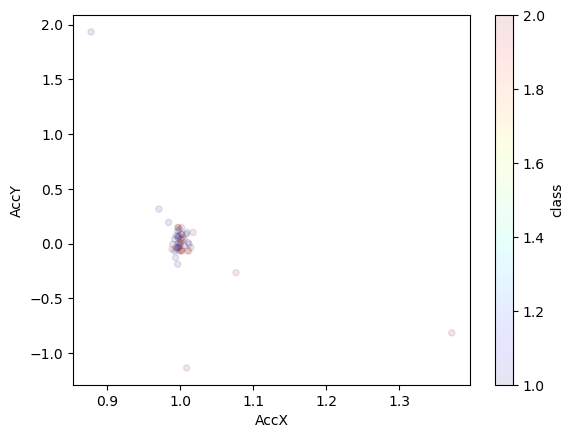

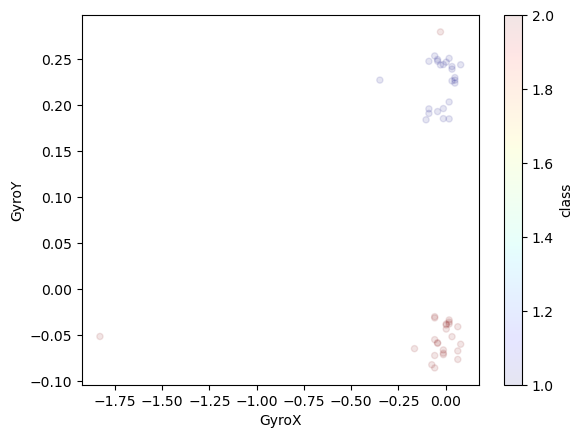

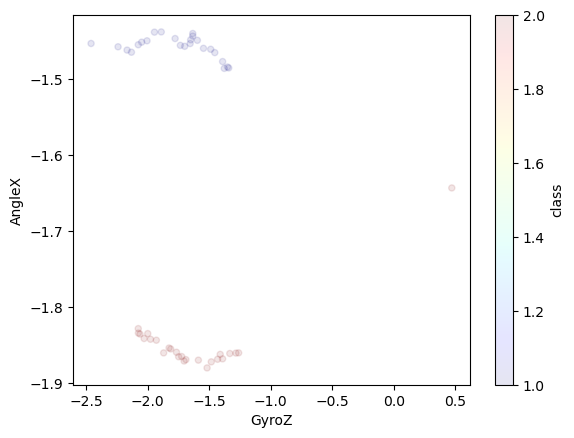

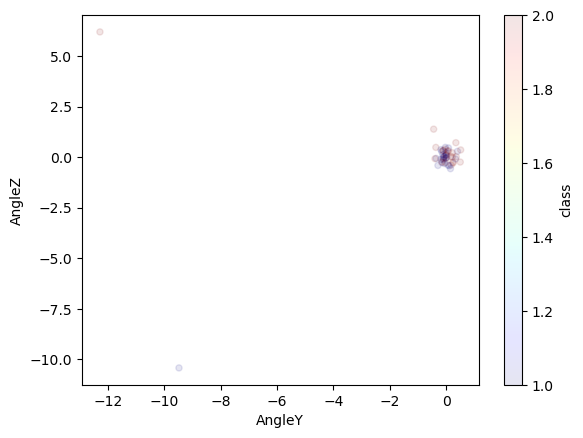

In [31]:
# Erstelle eine temporäre Spalte 'class' basierend auf One-Hot-Encoding
data['class'] = data.apply(lambda row: 1 if row['RuheState'] == 1 else (2 if row['FernstState'] == 1 else 3), axis=1)

# Visualisiere Scatterplots für jedes Sensor-Paar
sensor_pairs = [('AccX', 'AccY'), ('GyroX', 'GyroY'), ('GyroZ', 'AngleX'), ('AngleY', 'AngleZ')]
for pair in sensor_pairs:
    data.plot(kind="scatter", x=pair[0], y=pair[1], alpha=0.1, c='class', cmap=plt.get_cmap('jet'))
    #plt.title(f'Unskalierte Werte - {pair[0]} vs. {pair[1]}')
    plt.show()

# Entferne die temporäre 'class'-Spalte
data.drop('class', axis=1, inplace=True)


## 11. One Hot encoding der Klasse durchführen, wenn noch nicht geschehen (Beispiel)

In [19]:
#from sklearn.preprocessing import OneHotEncoder
#encoder = OneHotEncoder(categories='auto');
#data_label_matrix = data["class"].values.reshape(-1, 1)
#data_labels_1hot = encoder.fit_transform(data_label_matrix)
#data_labels_1hot.shape

## 12. Skalierung der Messwerte

In [33]:
from sklearn.preprocessing import MinMaxScaler
#data.drop('class', axis=1, inplace=True) # Ist bereits in Schritt 11 erfolgt
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
#print("data_scaled.shape:", data_scaled.shape, "\ndata_scaled:\n", data_scaled) # uncomment to visualize details

## 14. Skatterplots von Messwertpaaren mit vorheriger Skalierung

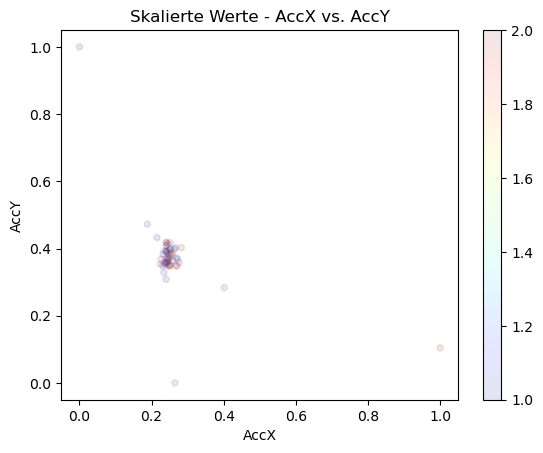

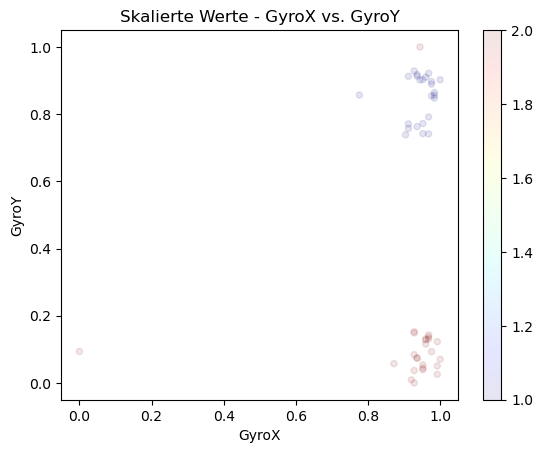

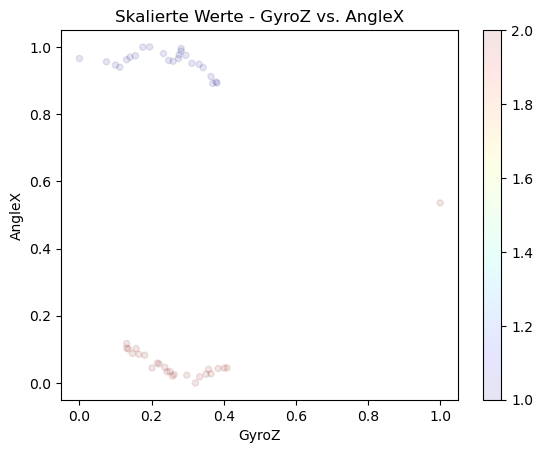

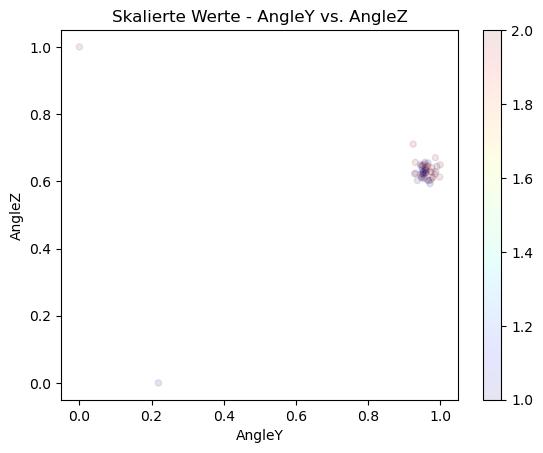

In [32]:
# Skalierte Werte in einem neuen DataFrame mit den ursprünglichen Spaltennamen
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)


# Erstelle eine temporäre Spalte 'class' basierend auf One-Hot-Encoding
data_scaled_df['class'] = data_scaled_df.apply(lambda row: 1 if row['RuheState'] == 1 else (2 if row['FernstState'] == 1 else 3), axis=1)


# Visualisiere Scatterplots für jedes Sensor-Paar mit den skalierten Werten und den originalen Klassen
sensor_pairs = [('AccX', 'AccY'), ('GyroX', 'GyroY'), ('GyroZ', 'AngleX'), ('AngleY', 'AngleZ')]
for pair in sensor_pairs:
    data_scaled_df.plot(kind="scatter", x=pair[0], y=pair[1], alpha=0.1, c=data_scaled_df['class'], cmap=plt.get_cmap('jet'))
    plt.title(f'Skalierte Werte - {pair[0]} vs. {pair[1]}')
    plt.show()

# Entferne die temporäre 'class'-Spalte
data_scaled_df.drop('class', axis=1, inplace=True)
